In [1]:
import pandas as pd
import quandl

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [10]:
aapl = quandl.get('WIKI/AAPL.11', start_date=start, end_date=end)
cisco = quandl.get('WIKI/CSCO.11', start_date=start, end_date=end)
ibm = quandl.get('WIKI/IBM.11', start_date=start, end_date=end)
amzn = quandl.get('WIKI/AMZN.11', start_date=start, end_date=end)

aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [7]:
aapl.iloc[0]

Adj. Close    52.848787
Name: 2012-01-03 00:00:00, dtype: float64

In [9]:
aapl.iloc[0]['Adj. Close']

52.848786580038

In [12]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Normed Return'] = stock_df['Adj. Close'] / stock_df.iloc[0]['Adj. Close']

In [15]:
aapl

,Adj. Close,Normed Return
Date,,
2012-01-03,52.848787,1.000000
2012-01-04,53.132802,1.005374
2012-01-05,53.722681,1.016536
2012-01-06,54.284287,1.027162
2012-01-09,54.198183,1.025533
...,...,...
2016-12-23,115.080808,2.177549
2016-12-27,115.811668,2.191378
2016-12-28,115.317843,2.182034


In [16]:
# 30% in apple
# 20% in cisco
# 10% in ibm
# 40% in amazon
for stock_df, allo in zip((aapl, cisco, ibm, amzn), (.3, .2, .1, .4)):
    stock_df['Allocation'] = stock_df['Normed Return'] * allo

In [17]:
aapl.head()

,Adj. Close,Normed Return,Allocation
Date,,,
2012-01-03,52.848787,1.000000,0.300000
2012-01-04,53.132802,1.005374,0.301612
2012-01-05,53.722681,1.016536,0.304961
2012-01-06,54.284287,1.027162,0.308149
2012-01-09,54.198183,1.025533,0.307660


In [19]:
for stock_df in (aapl, cisco, ibm, amzn):
    stock_df['Position Values'] = stock_df['Allocation'] * 1_000_000

In [21]:
aapl.head()

,Adj. Close,Normed Return,Allocation,Position Values
Date,,,,
2012-01-03,52.848787,1.000000,0.300000,300000.000000
2012-01-04,53.132802,1.005374,0.301612,301612.236461
2012-01-05,53.722681,1.016536,0.304961,304960.727573
2012-01-06,54.284287,1.027162,0.308149,308148.724558
2012-01-09,54.198183,1.025533,0.307660,307659.946988


In [27]:
portfolio_val = pd.concat(
    [aapl['Position Values'], cisco['Position Values'], ibm['Position Values'], amzn['Position Values']],
    axis=1
)
portfolio_val.columns = ['AAPL Pos', 'CISCO Pos', 'IBM Pos', 'AMZN Pos']
portfolio_val

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos
Date,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,4.000000e+05
2012-01-04,301612.236461,203864.734300,99592.055824,3.966039e+05
2012-01-05,304960.727573,203113.258186,99119.699410,3.968273e+05
2012-01-06,308148.724558,202361.782072,97981.749866,4.079987e+05
2012-01-09,307659.946988,203650.026838,97471.819646,3.989499e+05
...,...,...,...,...
2016-12-23,653264.617079,377469.015679,101839.988903,1.699358e+06
2016-12-27,657413.396830,379323.596496,102102.667778,1.723510e+06
2016-12-28,654610.167268,376108.989746,101522.330729,1.725141e+06


In [28]:
portfolio_val['Total Pos'] = portfolio_val.sum(axis=1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131,1.001673e+06
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372,1.004021e+06
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443,1.016491e+06
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665,1.007732e+06


In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Total Portfolio Value')

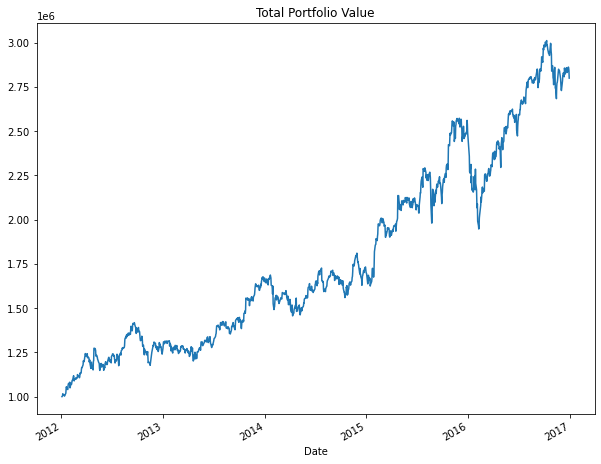

In [30]:
portfolio_val['Total Pos'].plot(figsize=(10, 8))
plt.title('Total Portfolio Value')

<AxesSubplot:xlabel='Date'>

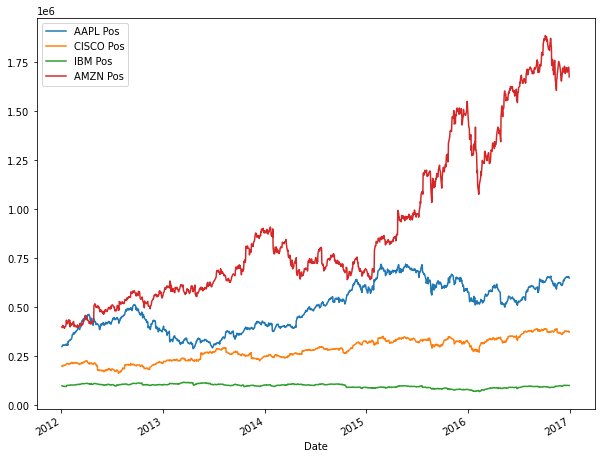

In [31]:
portfolio_val.drop('Total Pos', axis=1).plot(figsize=(10, 8))

## Portfolio Stats

In [32]:
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos
Date,,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131,1.001673e+06
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372,1.004021e+06
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443,1.016491e+06
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665,1.007732e+06


In [33]:
portfolio_val['Daily Return'] = portfolio_val['Total Pos'].pct_change(1)
portfolio_val.head()

,AAPL Pos,CISCO Pos,IBM Pos,AMZN Pos,Total Pos,Daily Return
Date,,,,,,
2012-01-03,300000.000000,200000.000000,100000.000000,400000.000000,1.000000e+06,NaN
2012-01-04,301612.236461,203864.734300,99592.055824,396603.921131,1.001673e+06,0.001673
2012-01-05,304960.727573,203113.258186,99119.699410,396827.347372,1.004021e+06,0.002344
2012-01-06,308148.724558,202361.782072,97981.749866,407998.659443,1.016491e+06,0.012420
2012-01-09,307659.946988,203650.026838,97471.819646,398949.896665,1.007732e+06,-0.008617


In [34]:
portfolio_val['Daily Return'].mean()

0.0009023579071769599

In [35]:
portfolio_val['Daily Return'].std()

0.012896893878458078

<AxesSubplot:ylabel='Frequency'>

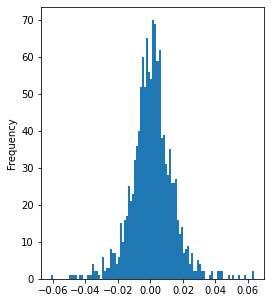

In [36]:
portfolio_val['Daily Return'].plot(kind='hist', bins=100, figsize=(4, 5))

<AxesSubplot:ylabel='Density'>

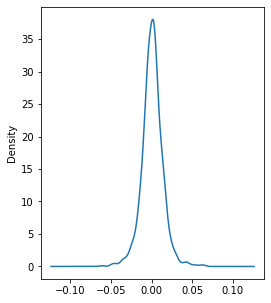

In [37]:
portfolio_val['Daily Return'].plot(kind='kde', figsize=(4, 5))

In [38]:
cumulative_return = 100 * (portfolio_val['Total Pos'][-1] / portfolio_val['Total Pos'][0] - 1)
cumulative_return

179.97828220000912

In [39]:
portfolio_val['Total Pos'][-1]

2799782.822000091

In [40]:
SR = portfolio_val['Daily Return'].mean() / portfolio_val['Daily Return'].std()
SR

0.0699670723571809

In [41]:
ASR = (252 ** 0.5) * SR
ASR

1.1106928405221748